In [1]:
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/proc_MA_1k_albums_not_cumulative.csv')
df = df.drop(['0'], axis=1).dropna(axis=0)
# df

In [3]:
# df['ignored tags'].dropna(axis=0)

In [4]:
tags_df = df[['tags','ignored tags']].dropna(axis=0)

In [5]:
ign_tags = tags_df['ignored tags'].values
tags = tags_df['tags'].values

In [6]:
ign_tags_list = []

for ign_tag in ign_tags:
    ign_tags_list.append(eval(ign_tag))

tags_list = []

for tag in tags:
    tags_list.append(eval(tag))

In [7]:
import itertools
ign_tags_merged = list(set(list(itertools.chain.from_iterable(ign_tags_list))))
tags_merged = list(set(list(itertools.chain.from_iterable(tags_list))))

In [8]:
G = nx.Graph()
G.add_nodes_from(tags_merged) #create a node for each tag
nx.set_node_attributes(G, 1,'weight')


In [9]:
for d in tags_list:
    # Increase node weight
    for n in d:
        G.nodes[n]['weight'] += 1

    # Draw Edges (or increase weight if already present)
    if len(d) >= 2:
        for comb in itertools.combinations(d, 2):
            u = comb[0]
            v = comb[1]
            if G.has_edge(u, v):
                G[u][v]['weight'] += 1
            else:
                G.add_edge(u, v, weight=1)


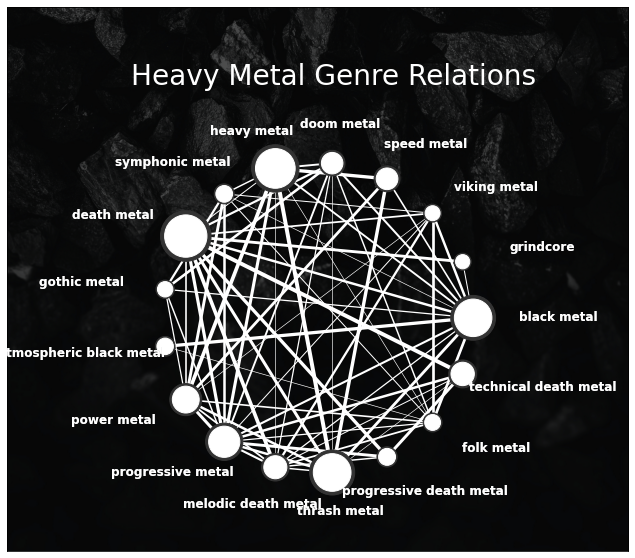

In [10]:
import math
n_weights = nx.get_node_attributes(G, 'weight')
n_weights = { key:value for (key,value) in n_weights.items() if value >= 25} # filter by min 10 entries
G_sub = G.subgraph(n_weights.keys())
edges,e_weights = zip(*nx.get_edge_attributes(G_sub,'weight').items())

plt.rcParams['axes.facecolor'] = 'black'
# COLOR = 'white'
# matplotlib.rcParams['text.color'] = COLOR

plt.figure(1,figsize=(12,10)) 

ax = plt.axes()
img = plt.imread("img/coal_bg_crop.jpg")
ax.imshow(img, extent=[-2, 2, -1.5, 2.5])
pos = nx.circular_layout(G_sub)
pos_outer = {}
offset = 1.05  # offset on the y axis

for k, v in pos.items():
    pos_outer[k] = (v[0]*(offset+0.5), v[1]*(offset+0.2))

nx.draw_networkx(G_sub, pos, nodelist=n_weights.keys(), node_size=[v * 10 for v in n_weights.values()], node_color='#333333', edge_color='white', width=[math.log(v, 3) * 1.0 for v in e_weights], with_labels=False)
nx.draw_networkx_nodes(G_sub, pos, nodelist=n_weights.keys(), node_size=[v * 7 for v in n_weights.values()], node_color='white')
nx.draw_networkx_labels(G_sub, pos_outer, font_color='darkgrey', font_weight='bold')
nx.draw_networkx_labels(G_sub, pos_outer, font_color='white', font_weight='bold')
plt.xlim([-2,2])
plt.ylim([-1.5,2])

ax.text(-1.2,1.5, 'Heavy Metal Genre Relations', size=28, color='white')

plt.show()
#TODO: savefig